In [1]:
%matplotlib notebook
import sys
sys.path.append('../code')

from mpl_toolkits.mplot3d import Axes3D
from krr import KernelRidgeRegression
from label_data import LabelData
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.sum((x-xp)**2)/(2*(sigma**2)))


def k_tanh(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

<IPython.core.display.Javascript object>


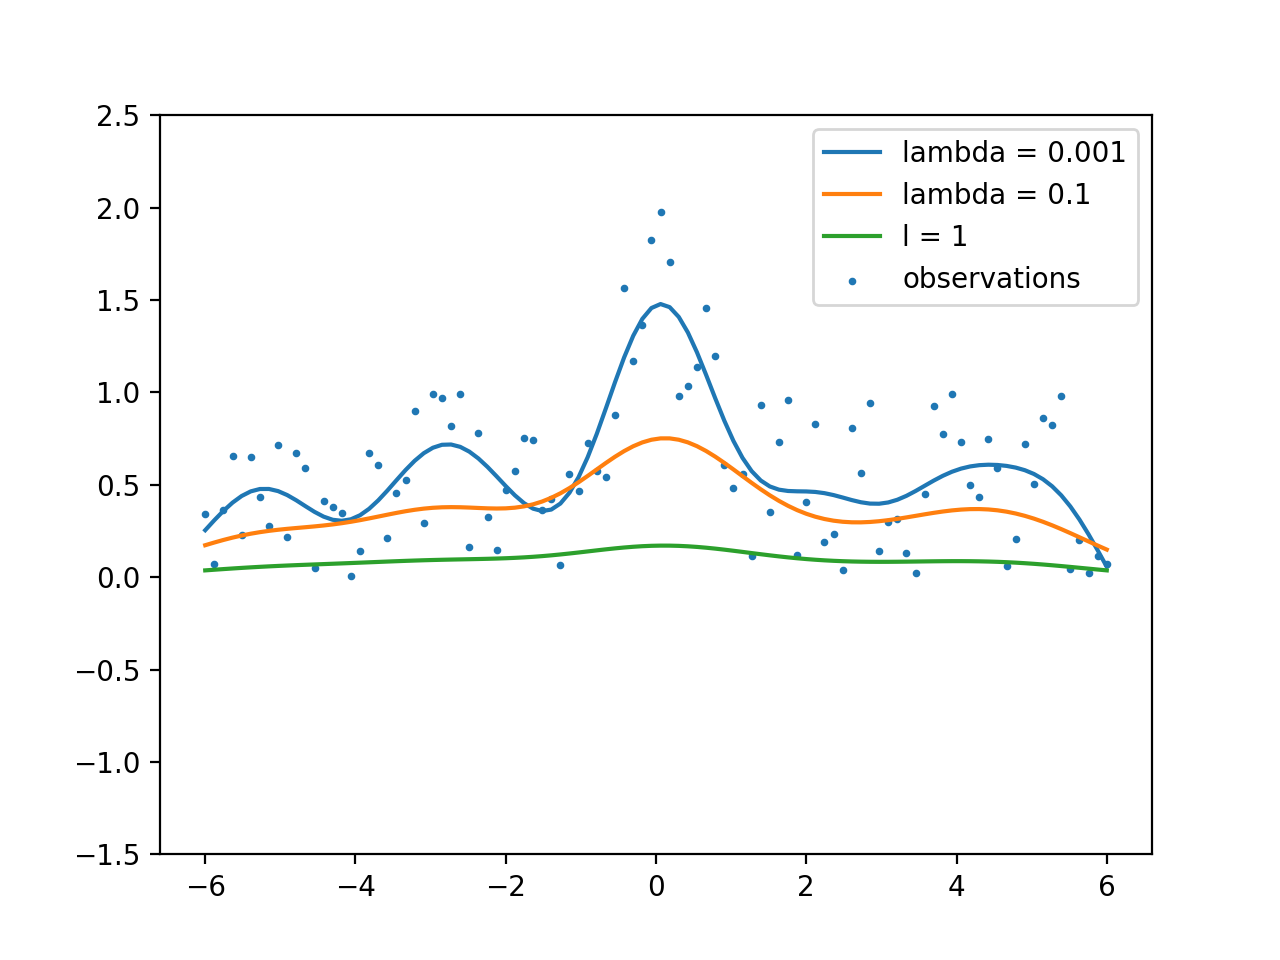

In [3]:
t = np.linspace(-6, 6, 100)
y = np.exp(-t**2)*np.cos(t) + np.random.rand(t.shape[0])

ld = LabelData()
ld.add_data(t, y)

kregr = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.01)

plt.figure()
plt.scatter(t, y, label='observations', s=3)
kregr.l = 0.001
plt.plot(t, kregr(t), label='lambda = 0.001')
kregr.l = 0.1
plt.plot(t, kregr(t), label='lambda = 0.1')
kregr.l = 1
plt.plot(t, kregr(t), label='l = 1')
plt.legend()
plt.ylim(-1.5, 2.5)
plt.show()

In [6]:
def fun(x, y):
    r = x**2 + y**2
    return np.sin(r)/r
    #return np.array(A > 1, dtype=np.int)
    #return x**2 + y

x = y = np.arange(-5.0, 5.0, 6/20.0)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y))) + np.random.rand(np.prod(X.shape))*0.5
Z = zs.reshape(X.shape)

ld = LabelData()
dat = np.vstack((np.ravel(X), np.ravel(Y))).T
print(dat.shape)
ld.add_data(dat, zs)

print("Training Gaussian")
kregr1 = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.001)
print("Training Polynomial")
kregr2 = KernelRidgeRegression(ld, k=lambda x,y: k_polynomial(x, y, 2), l=.001)
print("Training Tanh")
kregr3 = KernelRidgeRegression(ld, k=lambda x,y: k_tanh(x, y, 1/10, 1), l=.001)

z_r = kregr(dat)

(1156, 2)
Training Gaussian
Training Polynomial
Training Tanh


In [12]:
def fun(x, y):
    r = x**2 + y**2
    return np.sin(r)/r
    #return np.array(A > 1, dtype=np.int)
    #return x**2 + y

In [7]:
z_r1 = kregr1(dat)
z_r2 = kregr2(dat)
z_r3 = kregr3(dat)


<IPython.core.display.Javascript object>


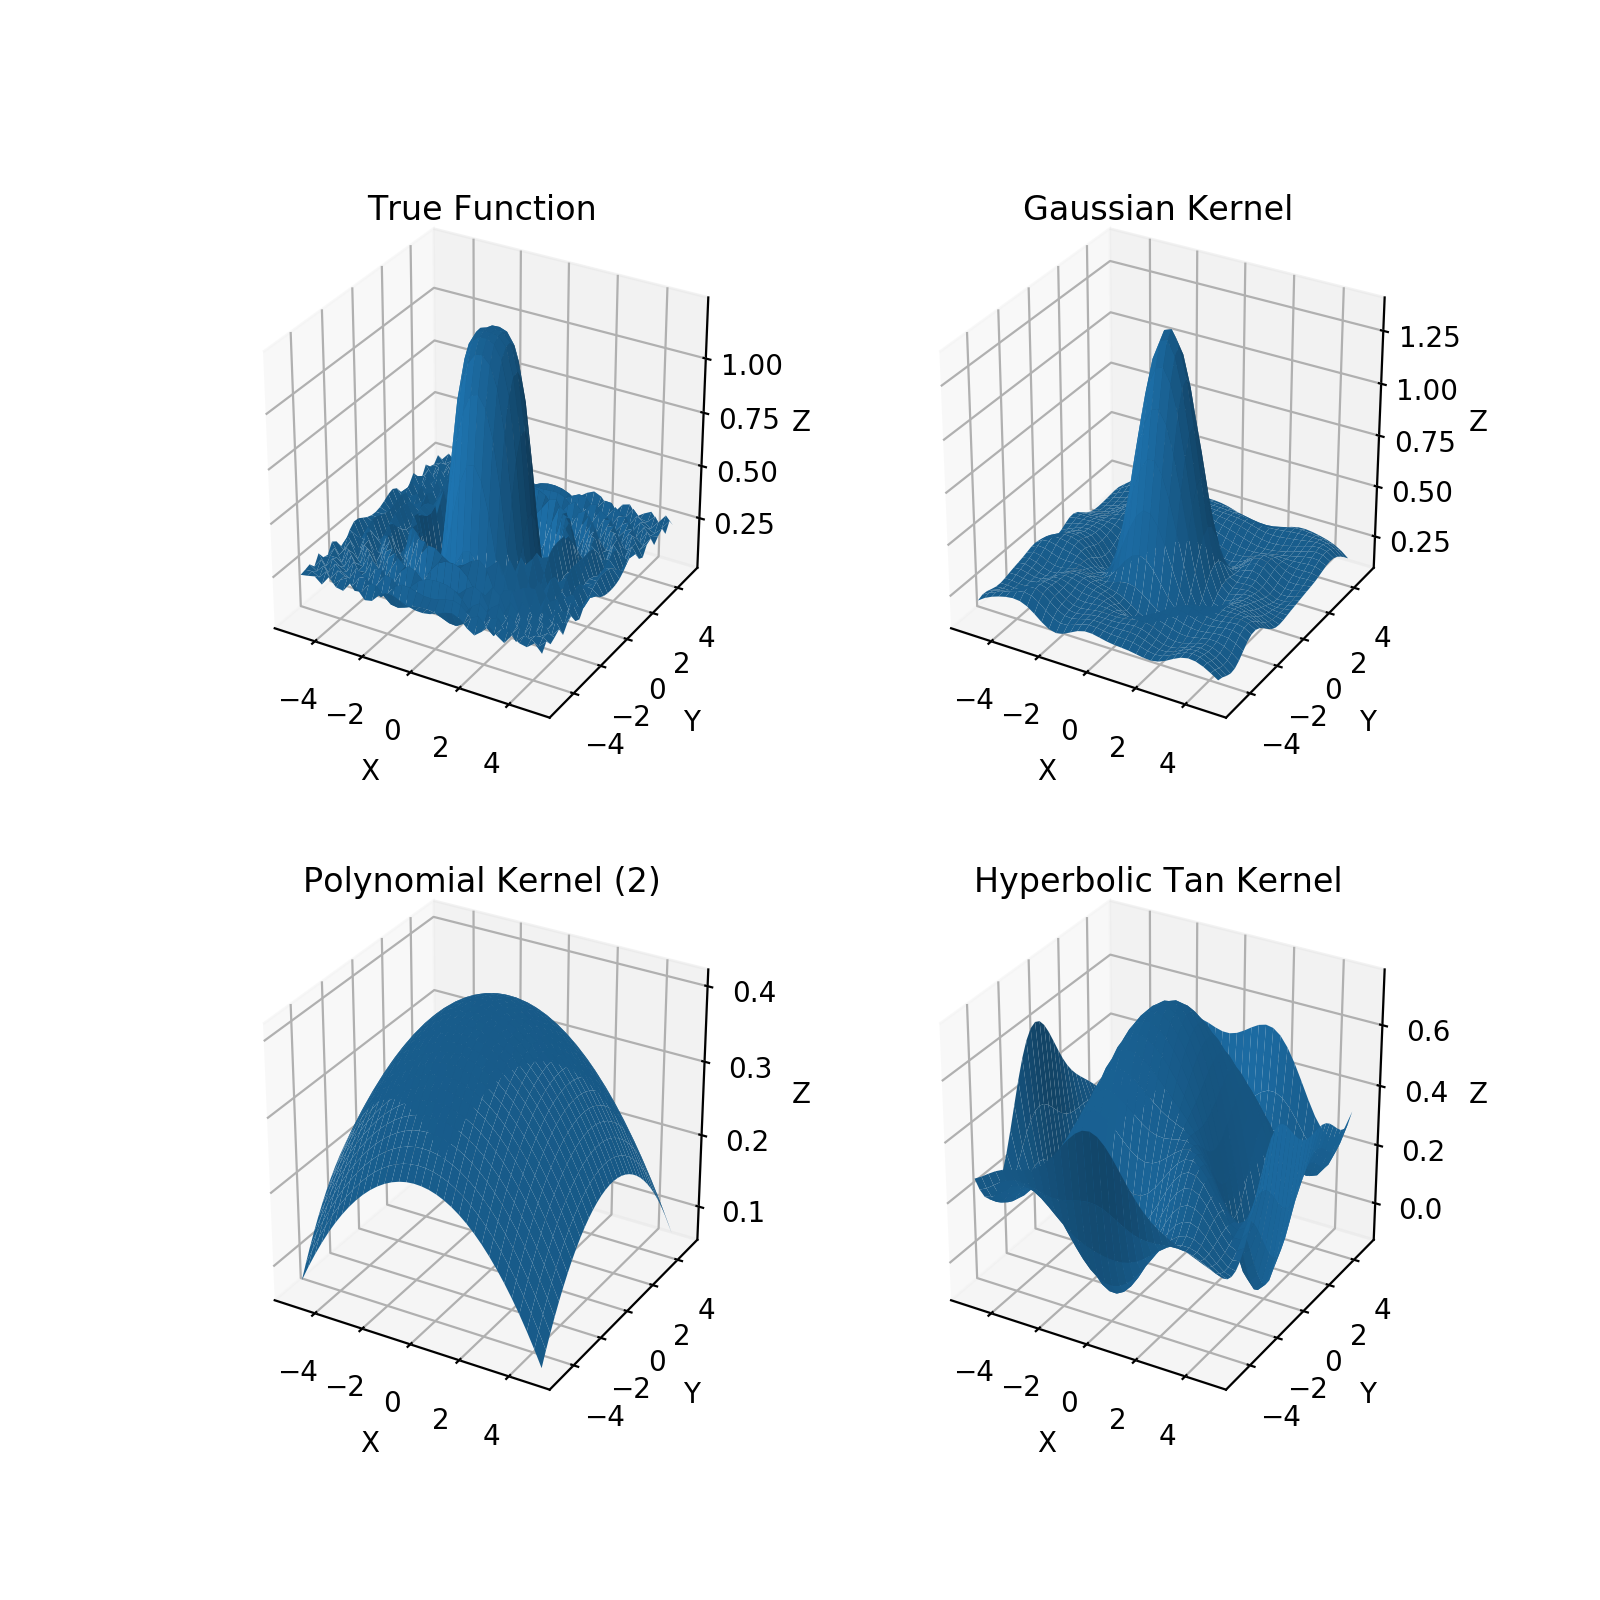

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [13]:
Zt = np.array(fun(np.ravel(X), np.ravel(Y))).reshape(X.shape) + 0.25

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221, projection='3d')
#ax.scatter(X, Y, Zt, s=.5, c='k')
ax.plot_surface(X, Y, Zt)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("True Function")

ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(X, Y, z_r1.reshape(X.shape))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Gaussian Kernel")

ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(X, Y, z_r2.reshape(X.shape))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Polynomial Kernel (2)")

ax = fig.add_subplot(224, projection='3d')
ax.plot_surface(X, Y, z_r3.reshape(X.shape))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Hyperbolic Tan Kernel")

plt.show()
plt.savefig("krr_k2.eps")

In [90]:
def fun(x, y):
    #r = x**2 + y**2
    #return np.sin(r)/r
    A = x + y
    return np.array(A > 1, dtype=np.int)
    #return x**2 + y

X = np.random.randn(30) - 3 
Y = np.random.randn(30) - 3 
X = np.hstack((X, np.random.randn(30) + 3))
Y = np.hstack((Y, np.random.randn(30) + 3))
#X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y))) + np.random.rand(np.prod(X.shape))*0.5
Z = zs.reshape(X.shape)

ld = LabelData()
dat = np.vstack((np.ravel(X), np.ravel(Y))).T
print(dat.shape)
ld.add_data(dat, zs)

print("Training Gaussian")
kregr1 = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.001)
print("Training Polynomial")
kregr2 = KernelRidgeRegression(ld, k=lambda x,y: k_polynomial(x, y, 2), l=.001)
print("Training Tanh")
kregr3 = KernelRidgeRegression(ld, k=lambda x,y: k_tanh(x, y, 1/10, 1), l=.001)

z_r = kregr(dat)

(60, 2)
Training Gaussian
Training Polynomial
Training Tanh


In [94]:
x = y = np.arange(-5.0, 5.0, 6/20.0)
XX, YY = np.meshgrid(x, y)


data2 = np.vstack((XX.ravel(), YY.ravel())).T
print(data2.shape)
z_r1 = kregr1(np.vstack((XX.ravel(), YY.ravel())).T)
z_r2 = kregr2(np.vstack((XX.ravel(), YY.ravel())).T)
z_r3 = kregr3(np.vstack((XX.ravel(), YY.ravel())).T)



(1156, 2)


<IPython.core.display.Javascript object>


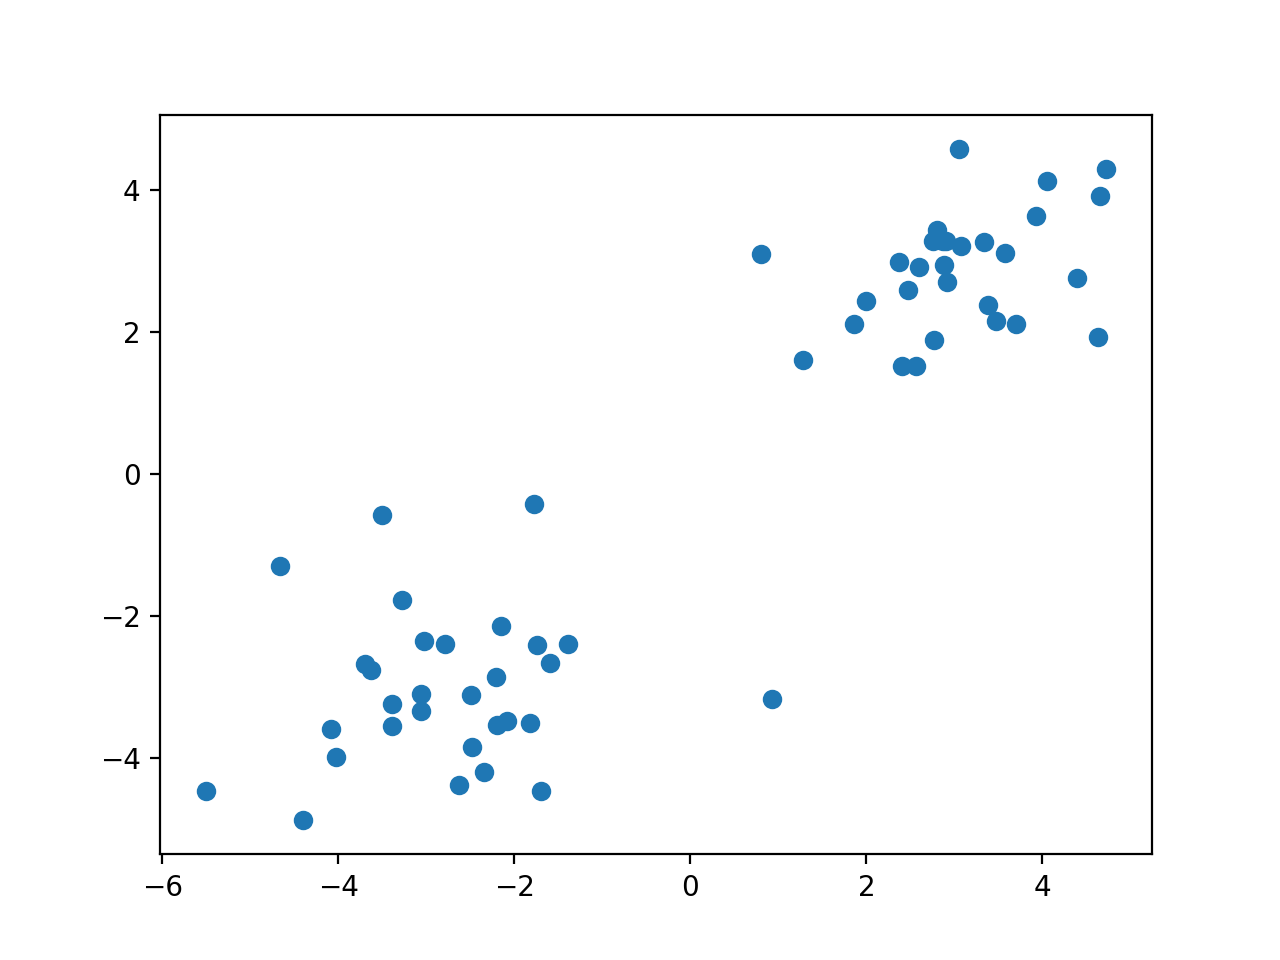

In [91]:
plt.figure()
plt.scatter(X, Y)
plt.show()

<IPython.core.display.Javascript object>


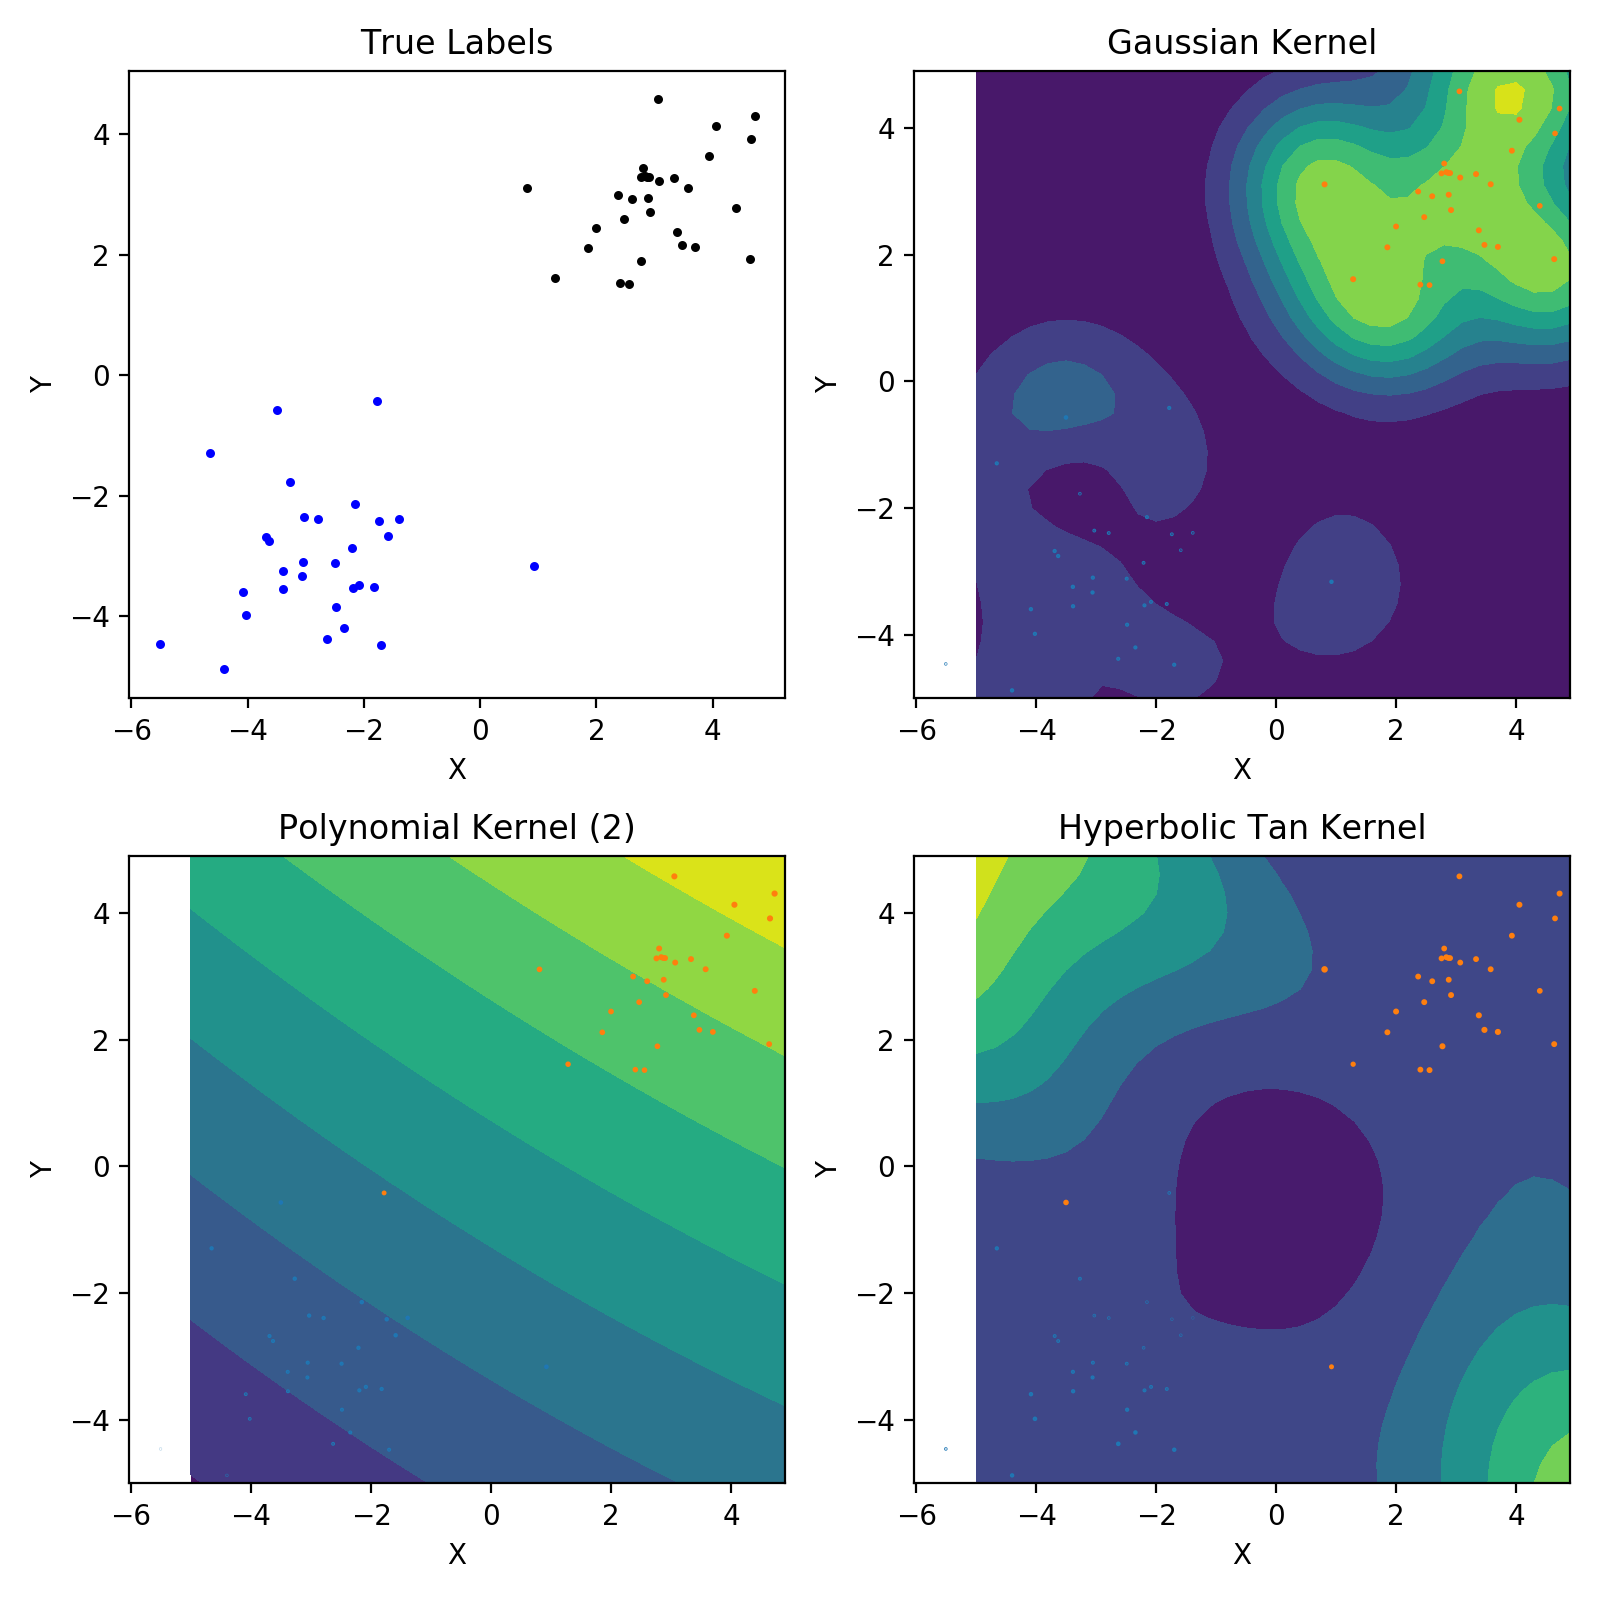

In [110]:

Zt = np.array(fun(np.ravel(X), np.ravel(Y))).reshape(X.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
#ax.contourf(X, Y, Zt)
ax.scatter(X[Zt == 1], Y[Zt == 1], s=5, c='k' )
ax.scatter(X[Zt == 0], Y[Zt == 0], s=5, c='b' )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("True Labels")

ax = fig.add_subplot(222)
ax.contourf(XX, YY, z_r1.reshape(XX.shape))
Z2 = kregr1(np.vstack((X.ravel(), Y.ravel())).T)
ax.scatter(X[Z2 < 0.5], Y[Z2 < 0.5], Z2[Z2 < 0.5])
ax.scatter(X[Z2 > 0.5], Y[Z2 > 0.5], Z2[Z2 > 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Gaussian Kernel")

ax = fig.add_subplot(223)
ax.contourf(XX, YY, z_r2.reshape(XX.shape))
Z2 = kregr2(np.vstack((X.ravel(), Y.ravel())).T)
ax.scatter(X[Z2 < 0.5], Y[Z2 < 0.5], Z2[Z2 < 0.5])
ax.scatter(X[Z2 > 0.5], Y[Z2 > 0.5], Z2[Z2 > 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Polynomial Kernel (2)")

ax = fig.add_subplot(224)
ax.contourf(XX, YY, z_r3.reshape(XX.shape))
Z2 = kregr3(np.vstack((X.ravel(), Y.ravel())).T)
ax.scatter(X[Z2 < 0.5], Y[Z2 < 0.5], Z2[Z2 < 0.5])
ax.scatter(X[Z2 > 0.5], Y[Z2 > 0.5], Z2[Z2 > 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Hyperbolic Tan Kernel")

plt.show()
plt.tight_layout()
plt.savefig("krr_k2.eps")